PROBLEM DEFINiTION

Farmers need simple, practical advice they can act on ,not theory. This program will take easy to measure inputs like soil Nitogen, Phosphorus, Potassium, pH; local temperature, humidity, rainfall and tell a farmer which crop is most likely to succeed on their land right now, plus short, actionable tips (fertilizer, pH fix, irrigation) to improve yield.

Primary objective

Maximize the chance of a profitable, healthy crop by matching crop requirements to on-farm soil and climate.

Secondary objectives

Minimize unnecessary inputs (over-application of fertilizer or water).

Give easy-to-follow actions farmers can implement without special training.

Be usable offline or with intermittent connectivity.

DATA PREPARATION

In [24]:
from google.colab import files
import io
import pandas as pd

In [25]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Crop_recommendation.csv']))

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
print(uploaded.keys())

dict_keys(['Crop_recommendation.csv'])


In [27]:
# Rename columns with more descriptive names
df = df.rename(columns={
    'N': 'Nitrogen',
    'P': 'Phosphorus',
    'K': 'Potassium',
    'temperature': 'Temperature',
    'humidity': 'Humidity',
    'ph': 'pH',
    'rainfall': 'Rainfall',
    'label': 'Crop'
})

print(df.columns)

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH',
       'Rainfall', 'Crop'],
      dtype='object')


In [31]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [30]:
#remove duplicates
df = df.drop_duplicates()

In [32]:
#check for missing values
df.isnull().sum()

,0
Nitrogen,0
Phosphorus,0
Potassium,0
Temperature,0
Humidity,0
pH,0
Rainfall,0
Crop,0


In [33]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [34]:
#apply label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['Crop'])

In [35]:
#split features and target
X = df.drop(columns=['Crop', 'label_encoded'])
y = df['label_encoded']

In [36]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [39]:
# 4. Split into train and test sets (e.g., 80% train, 20% test)
from sklearn.model_selection import train_test_split
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1275, 7)
X_test shape: (319, 7)
y_train shape: (1275,)
y_test shape: (319,)


TRAINING THE MODEL(RANDOM FOREST)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize the model
rf = RandomForestClassifier(
    n_estimators=100,   # number of trees
    random_state=42
)

In [42]:
# 2. Train on training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# 3. Predict on test data
y_pred = rf.predict(X_test)

In [44]:
# 4. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        21
       beans       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
     cowpeas       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
  groundnuts       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
        peas       1.00      1.00      1.00        20
        rice       1.00      1.00      1.00        28
  watermelon       1.00      1.00      1.00        20

    accuracy                           1.00       319
   macro avg       1.00      1.00      1.

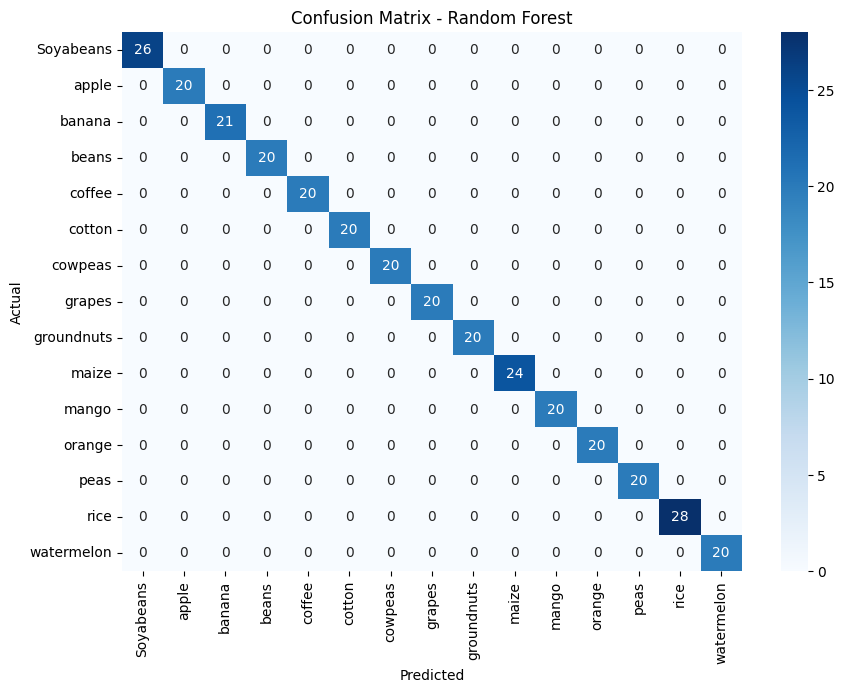

In [45]:
# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

APPLY CROSS VALIDATION

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Features (scaled) and target (encoded)
X = X_scaled
y = y

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Show results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

Cross-validation scores: [1.        0.9968652 1.        1.        1.       ]
Mean accuracy: 0.9993730407523511
Standard deviation: 0.001253918495297812


FEATURE IMPORTANCE

       Feature  Importance
4     Humidity    0.238570
2    Potassium    0.206260
6     Rainfall    0.179821
1   Phosphorus    0.167370
0     Nitrogen    0.116602
3  Temperature    0.055057
5           pH    0.036319


/tmp/ipython-input-2468013832.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


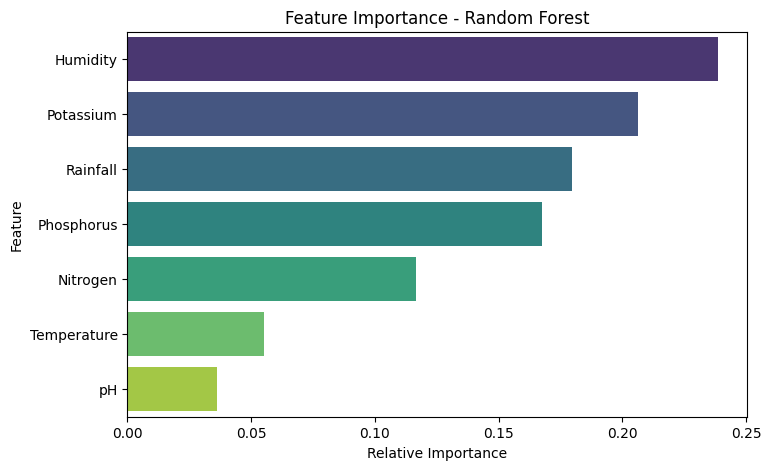

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest on the full dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Put into a DataFrame for clarity
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display table
print(feat_imp)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()

INSIGHTS

Water factors dominate (Humidity + Rainfall ≈ 42%).

Soil nutrients (N, P, K) together contribute ~54% importance.

pH and Temperature contribute much less, meaning crops in this dataset are less distinguishable by those features.

TRYING ANOTHER MODEL(XG BOOST)

In [48]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize model
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=6,           # depth of each tree
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss" # avoids warning
)

In [49]:
# Train the model
xgb_clf.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:32:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [50]:
# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))

XGBoost Accuracy: 0.9968652037617555

Classification Report:
               precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        21
       beans       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
     cowpeas       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
  groundnuts       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
        peas       1.00      0.95      0.97        20
        rice       0.97      1.00      0.98        28
  watermelon       1.00      1.00      1.00        20

    accuracy                           1.00       319
   macro avg      

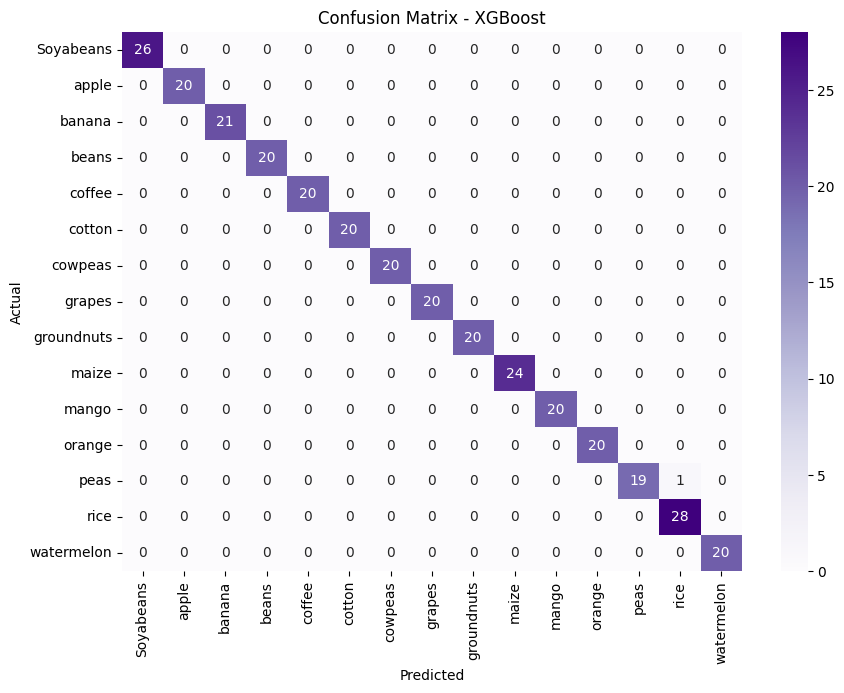

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

APPLYING CROSS VALIDATION

In [52]:
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb

# Define the model
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='accuracy')

# Results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:37:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:37:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:37:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:37:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:37:42] WARNING: /w

Cross-validation scores: [0.99059561 0.99059561 0.9968652  1.         0.99685535]
Mean accuracy: 0.9949823544488476
Standard deviation: 0.0037607716388906955


WHAT IT SIGNIFIES:

XGBoost is robust and reliable for this dataset.

Even when the data is shuffled and split differently, the model maintains near-perfect accuracy.

Compared to Random Forest:

RF cross-val mean was ≈ 0.999 (almost perfect).

XGBoost is slightly lower (≈ 0.995), but this small drop may suggest it’s less overfit and more realistic in performance.

CONCLUSION
The XGBoost model achieves 99.5% accuracy consistently across folds with very little variance, meaning it is an excellent and trustworthy model for crop prediction.

FEATURE IMPORTANCE

In [55]:
# Re-train the model (if not already fitted in this session)
xgb_clf.fit(X_train, y_train)

# Now extract feature importances
xgb_importances = xgb_clf.feature_importances_

# Put into DataFrame
feat_imp_xgb = pd.DataFrame({
    "Feature": X.columns,
    "XGBoost Importance": xgb_importances
}).sort_values(by="XGBoost Importance", ascending=False)

print(feat_imp_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:46:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


       Feature  XGBoost Importance
1   Phosphorus            0.204142
6     Rainfall            0.193745
2    Potassium            0.185608
4     Humidity            0.179531
0     Nitrogen            0.139430
3  Temperature            0.073548
5           pH            0.023996


/tmp/ipython-input-3257382851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="XGBoost Importance", y="Feature", data=feat_imp_xgb, palette="mako")


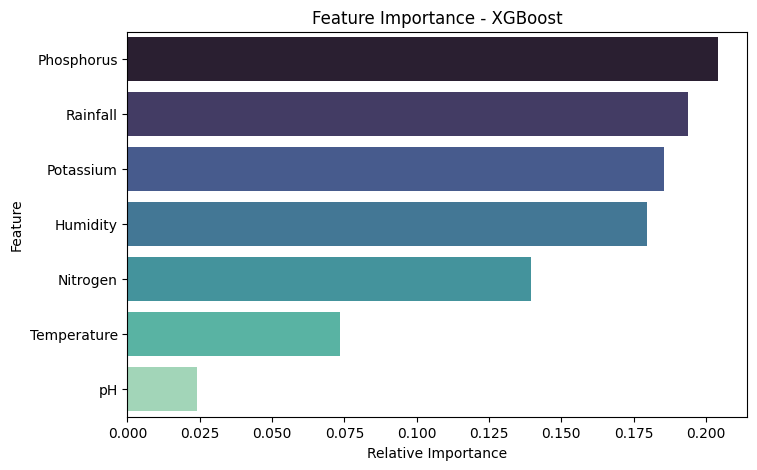

In [56]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="XGBoost Importance", y="Feature", data=feat_imp_xgb, palette="mako")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()

KEY COMPARISONS WITH RANDOM FOREST

1. Top features differ slightly:

Random Forest: Humidity was most important.

XGBoost: Phosphorus is most important.

2. Nutrients (P, K, N) are consistently strong in both models.

XGBoost ranks Phosphorus > Potassium > Nitrogen.

RF ranked Potassium > Phosphorus > Nitrogen.

3. Rainfall and Humidity are highly influential in both models, but their order shifts.

Temperature and pH remain low-importance in both.

pH is the least influential in both models.

INSIGHTS

Both models agree: nutrients (N, P, K) + water availability (Rainfall, Humidity) are the main drivers of crop prediction.

Slight differences in ranking show how the algorithms learn feature interactions differently.

For practical purposes, crops are mostly determined by soil nutrients + water conditions.